In [10]:
import numpy as np
import pandas as pd
from windpowerlib import ModelChain, WindTurbine
from windpowerlib import data as wt
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [11]:
weather_data = pd.read_csv("./weather_montreal.csv",
                           index_col=0, header=[0,1],
                          date_parser=lambda idx:pd.to_datetime(idx, utc=True))

In [12]:
weather_data.head()

variable_name,pressure,temperature,wind_speed,roughness_length,temperature,wind_speed
height,0,2,10,0,10,50
2019-01-01 00:00:00+00:00,99760,273.37,7.11,0.15,273.27,9.85
2019-01-01 01:00:00+00:00,99480,273.56,6.87,0.15,273.46,10.08
2019-01-01 02:00:00+00:00,99200,273.58,6.21,0.15,273.48,9.27
2019-01-01 03:00:00+00:00,98910,273.61,3.66,0.15,273.51,6.51
2019-01-01 04:00:00+00:00,98760,273.58,1.26,0.15,273.48,2.28


## Wind turbine selection

In [13]:
turbine_lib = wt.get_turbine_types(print_out=False)

In [14]:
turbine_lib

,manufacturer,turbine_type,has_power_curve,has_cp_curve
0,Adwen/Areva,AD116/5000,True,False
1,Enercon,E-101/3050,True,True
2,Enercon,E-101/3500,True,True
3,Enercon,E-115/3000,True,True
4,Enercon,E-115/3200,True,True
...,...,...,...,...
62,Vestas,V80/2000,True,False
63,Vestas,V90/2000,True,True
64,Vestas,V90/2000/GS,True,True
65,Vestas,V90/3000,True,False


In [15]:
selected_turbine = {"turbine_type":"E48/800", 
                    "hub_height":60, }

In [16]:
w_turbine = WindTurbine(**selected_turbine)

In [9]:
turbine_sub_models = {
    "wind_speed_model":"hellman", # "hellman", "logarithmic" (default), "interpolation-extrapolation" 
    "density_model":"ideal_gas", # "barometric" (default), "interpolation-extrapolation"
    "temperature_model":"linear_gradient", # interpolation-extrapolation"
    "power_output_model":"power_coefficient_curve", # "power_curve" (default)
    "density_correction":True, # False (default)
    "obstacle_height":0, # default is 0
    "hellman_exp":0.25
}

In [19]:
model = ModelChain(w_turbine, **turbine_sub_models).run_model(weather_data)

In [20]:
turbine_power_output = model.power_output

In [21]:
turbine_power_output # in watts

2019-01-01 00:00:00+00:00    607007.262981
2019-01-01 01:00:00+00:00    632135.315297
2019-01-01 02:00:00+00:00    518769.474098
2019-01-01 03:00:00+00:00    167707.041459
2019-01-01 04:00:00+00:00      1009.321805
                                 ...      
2019-12-31 19:00:00+00:00     28706.122846
2019-12-31 20:00:00+00:00     57379.248988
2019-12-31 21:00:00+00:00    160043.377176
2019-12-31 22:00:00+00:00    289477.525999
2019-12-31 23:00:00+00:00    271784.218019
Name: feedin_power_plant, Length: 8760, dtype: float64

In [22]:
turbine_power_output/1e3

2019-01-01 00:00:00+00:00    607.007263
2019-01-01 01:00:00+00:00    632.135315
2019-01-01 02:00:00+00:00    518.769474
2019-01-01 03:00:00+00:00    167.707041
2019-01-01 04:00:00+00:00      1.009322
                                ...    
2019-12-31 19:00:00+00:00     28.706123
2019-12-31 20:00:00+00:00     57.379249
2019-12-31 21:00:00+00:00    160.043377
2019-12-31 22:00:00+00:00    289.477526
2019-12-31 23:00:00+00:00    271.784218
Name: feedin_power_plant, Length: 8760, dtype: float64

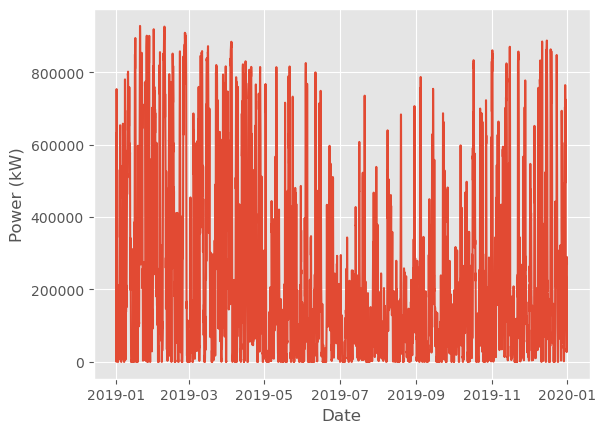

In [24]:
plt.plot(turbine_power_output);
plt.xlabel("Date");
plt.ylabel("Power (kW)");